<h2> Approximate the value of &pi; with Monte Carlo Simulation and Python </h2>
<p> 

The code below uses a random generating function to generate an n amount of float numbers between 0 and 1 that are then used to construct Cartesian coordinates in the form of (x,y).  The radius of the circle will therefore be 1 and as n increases, if we plot the randomly generated points, the scatter plot will begin to resemble more and more that of a square. We can split the randomly generated Cartesian coordinates into two different categories,  the first category representing points on the plot that are inside the interior region of the circle and the second category with points in the exterior region. The points on the plot that are inside the interior region of the circle will have a vector magnitude |r&#8407;| = &#x221A;(x&#178;+y&#178;)  &#8804; 1. We can then approximate the value of &pi; using the area formula of a circle A = &pi;r&#178; = &frac14;&pi; ( In this case, the radius is 1 and we are only looking at the area in the first quadrant of the circle). The distribution of the n randomly generated numbers is proportionate to the area,  we can therefore calculate the area by dividing the number of points in the interior region by the total number of randomly generated points. 
</p>



In [3]:
import numpy as np
import math

def gimme_pi(n_list):
    for n in n_list:
        # Generate an array with random float values between 0 and 1.
        x_axis = np.random.uniform(low=0, high=1, size=(n,))
        y_axis = np.random.uniform(low=0, high=1, size=(n,))
        # Calculate vector length. 
        r_vector_lengths = [math.sqrt(x**2+y**2) for x, y in zip(x_axis, y_axis)]
        r_outer = 0
        r_inner = 0
        for r in r_vector_lengths:
            if r > 1:
                r_outer += 1
            elif r <=1:
                r_inner += 1
        # Calculate the estimated value of pi
        pi_approx = 4*r_inner/n
        # Calculate percent difference & accuracy
        if np.pi > pi_approx:
            percent_diff = ((np.pi-pi_approx)/np.pi) * 100
        elif np.pi < pi_approx:
            percent_diff = ((pi_approx-np.pi)/pi_approx) * 100
        elif np.pi == pi_approx:
            percent_diff = 0
            print('A Miracle Occurred Today!')           
        print('-'*100)
        print(f'n value : {n}')
        print(f'The approximate value of pi is : {pi_approx}')
        print(f'Number of points outside the circle boundary: {r_outer}')
        print(f'Number of points inside the circle boundary : {r_inner}')
        print(f'Perent difference : {round(percent_diff,3)} %')
        print(f'Perent accuracy : {round(100-percent_diff,3)} %')
        print('-'*100)

In [2]:
gimme_pi([10,100,1000,10000,100000,1000000])

----------------------------------------------------------------------------------------------------
n value : 10
The approximate value of pi is : 2.8
Number of points outside the circle boundary: 3
Number of points inside the circle boundary : 7
Perent difference : 10.873 %
Perent accuracy : 89.127 %
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
n value : 100
The approximate value of pi is : 3.36
Number of points outside the circle boundary: 16
Number of points inside the circle boundary : 84
Perent difference : 6.5 %
Perent accuracy : 93.5 %
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
n value : 1000
The approximate value of pi is : 3.124
Number of points outside the circle bo

<h3> Plot the points using matplotlib </h3>
<p> This is a significantly slower process due to the added processing time from visualization. </p>

In [4]:
import matplotlib.pyplot as plt

def plot_gimme_pi(n_list):
    for n in n_list:
        # Generate an array with random float values between 0 and 1.
        x_axis = np.random.uniform(low=0, high=1, size=(n,))
        y_axis = np.random.uniform(low=0, high=1, size=(n,))
        r_outer = 0
        r_inner = 0
        for x, y in zip(x_axis, y_axis):
            # Calculate vector length. 
            r_vector_length = math.sqrt(x**2+y**2) 
            if r_vector_length > 1:
                r_outer += 1
                dot_color = 'red' 
            elif r_vector_length <=1:
                r_inner += 1
                dot_color = 'green'
            plt.scatter(x, y, c=dot_color, alpha=0.5)
        # Calculate the estimated value of pi
        pi_approx = 4*r_inner/n
        # Calculate percent difference & accuracy
        if np.pi > pi_approx:
            percent_diff = ((np.pi-pi_approx)/np.pi) * 100
        elif np.pi < pi_approx:
            percent_diff = ((pi_approx-np.pi)/pi_approx) * 100
        elif np.pi == pi_approx:
            percent_diff = 0
            print('A Miracle Occurred Today')
        print('-'*100)
        print(f'n value : {n}')
        print(f'The approximate value of pi is : {pi_approx}')
        print(f'Number of points outside the circle boundary: {r_outer}')
        print(f'Number of points inside the circle boundary : {r_inner}')
        print(f'Perent difference : {round(percent_diff,3)} %')
        print(f'Perent accuracy : {round(100-percent_diff,3)} %')
        plt.show()
        print('-'*100)    

----------------------------------------------------------------------------------------------------
n value : 50
The approximate value of pi is : 3.52
Number of points outside the circle boundary: 6
Number of points inside the circle boundary : 44
Perent difference : 10.75 %
Perent accuracy : 89.25 %


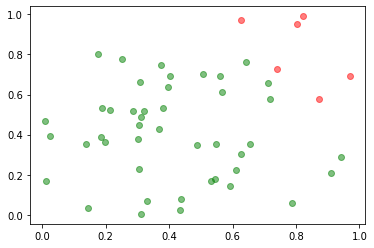

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
n value : 200
The approximate value of pi is : 3.22
Number of points outside the circle boundary: 39
Number of points inside the circle boundary : 161
Perent difference : 2.435 %
Perent accuracy : 97.565 %


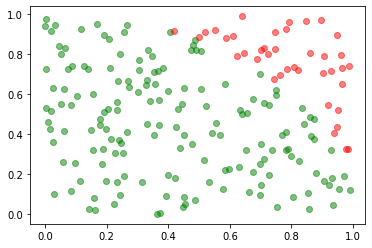

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
n value : 500
The approximate value of pi is : 3.088
Number of points outside the circle boundary: 114
Number of points inside the circle boundary : 386
Perent difference : 1.706 %
Perent accuracy : 98.294 %


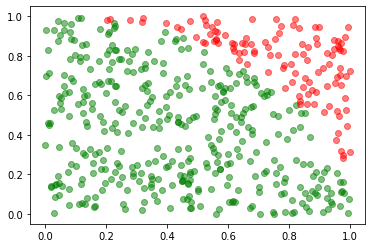

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
n value : 1000
The approximate value of pi is : 3.172
Number of points outside the circle boundary: 207
Number of points inside the circle boundary : 793
Perent difference : 0.959 %
Perent accuracy : 99.041 %


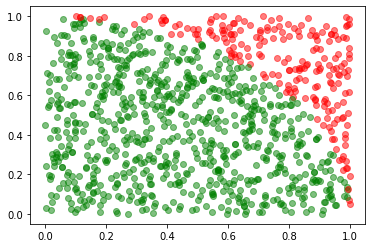

----------------------------------------------------------------------------------------------------


In [5]:
plot_gimme_pi([50,200,500,1000])